In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

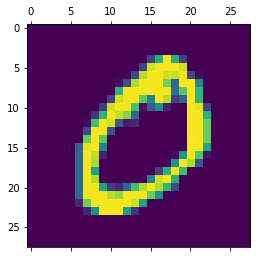

In [7]:
plt.matshow(X_train[1])

In [8]:
y_train[1]

0

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4885 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3059 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2857 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2746 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2679 - accuracy: 0.9258


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2654 - accuracy: 0.9271


[0.2654215693473816, 0.9271000027656555]

In [14]:
y_predicted = model.predict(X_test_flattened)

In [15]:
y_predicted[-1]

array([5.1202402e-08, 4.9194292e-16, 2.5734330e-06, 1.9768523e-10,
       1.0128455e-08, 3.3150928e-07, 5.7311565e-02, 3.7734586e-14,
       1.3295047e-09, 1.2072333e-12], dtype=float32)

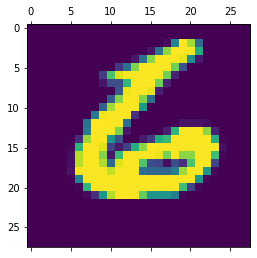

In [16]:
plt.matshow(X_test[-1])

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:
y_predicted_labels[-1]

6

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

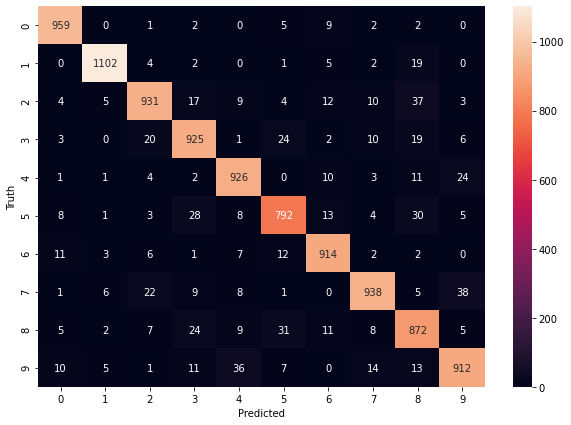

In [20]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2727 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1235 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0878 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0673 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0533 - accuracy: 0.9844


In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0848 - accuracy: 0.9729


[0.08483917266130447, 0.9728999733924866]

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

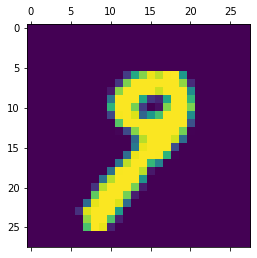

In [24]:
plt.matshow(X_test[73])

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [26]:
y_predicted_labels[73]

9

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

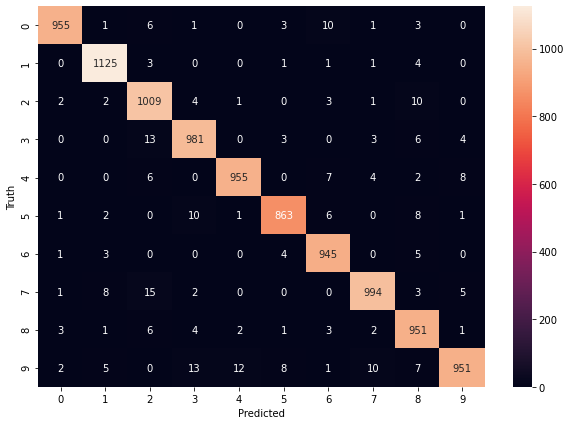

In [28]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	img = abs(img-1)
	return img

/home/harivinay/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


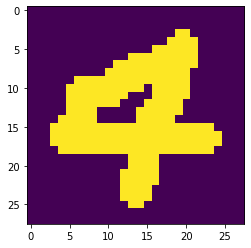

In [30]:
number = load_image('four.png')

plt.imshow(number)

In [31]:
xnum = np.double(number.reshape(1,28*28))

In [32]:
ynum_predicted = model.predict(xnum) 
ynum_predicted_labels = [np.argmax(i) for i in ynum_predicted]

In [33]:
ynum_predicted_labels

[4]

In [34]:
ynum_predicted

array([[2.9441335e-06, 3.2967947e-12, 9.7840755e-05, 1.8245657e-03,
        9.6366984e-01, 5.3394265e-06, 5.7802534e-08, 3.1738415e-05,
        8.9189294e-04, 3.3475820e-02]], dtype=float32)